In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

USER = 'postgres'
PASSWORD = '123'
HOST = 'localhost'
PORT = '5432'
DBNAME = 'sigeem'

engine = create_engine(f'postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}')
sns.set_theme(style="whitegrid")

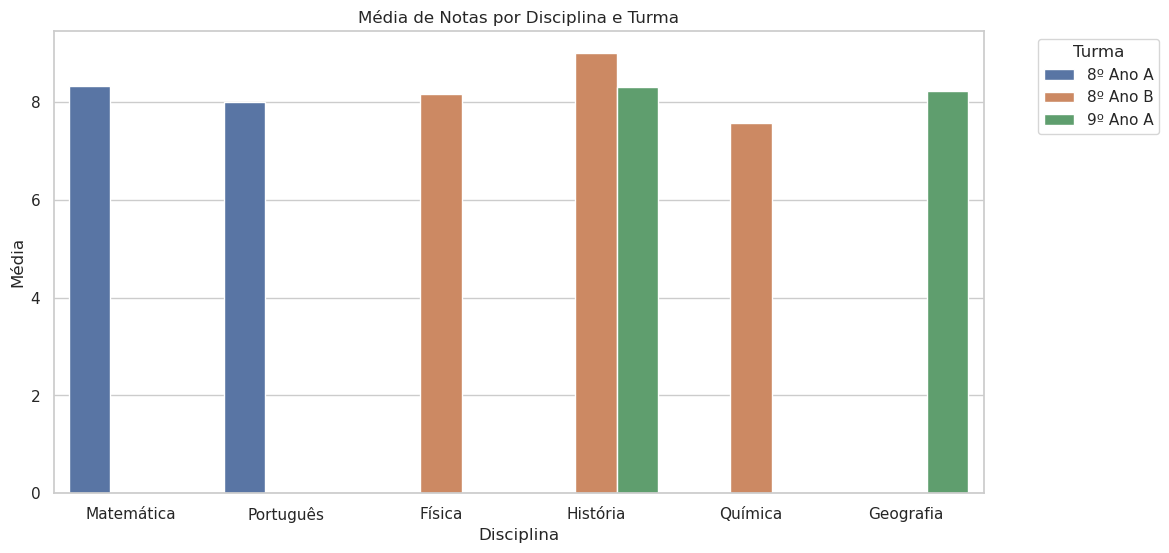

In [ ]:
query1 = """
SELECT turma.nome AS nome_turma, disci.nome_disciplina, AVG(nota.nota) as media_nota
FROM Nota nota
JOIN Turma turma ON nota.id_turma = turma.id_turma
JOIN Disciplina disci ON nota.id_disciplina = disci.id_disciplina
GROUP BY turma.nome, disci.nome_disciplina
ORDER BY turma.nome;
"""

df_medias = pandas.read_sql(query1, engine)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_medias, x='nome_disciplina', y='media_nota', hue='nome_turma')
plt.title('Média de Notas de Turmas por Disciplina')
plt.ylabel('Média')
plt.xlabel('Disciplina')
plt.legend(title='Turma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

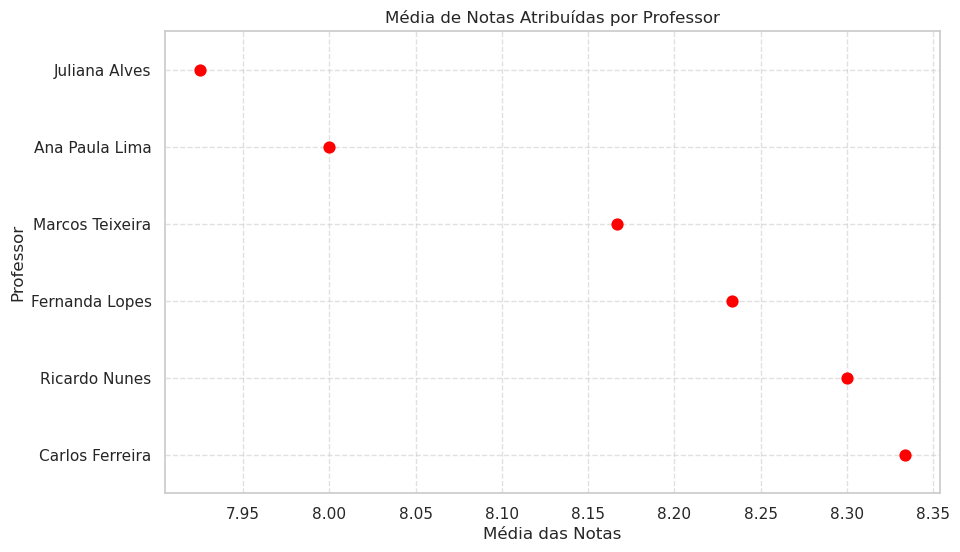

In [ ]:
query_prof_notas = """
SELECT prof.nome_completo AS professor, AVG(nota.nota) as media_prof
FROM Nota nota
JOIN Professor prof ON nota.id_professor = prof.id_professor
GROUP BY prof.nome_completo
ORDER BY media_prof ASC;
"""

df_prof = pandas.read_sql(query_prof_notas, engine)

plt.figure(figsize=(10, 6))
sns.pointplot(data=df_prof, x='media_prof', y='professor', linestyle='none', color='red')
plt.title('Média de Notas Atribuídas por Professor')
plt.xlabel('Média das Notas')
plt.ylabel('Professor')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
query_carga = """
SELECT prof.area_formacao, SUM(disci.carga_horaria) as carga_total
FROM Prof_Habilitado prfhab
JOIN Professor prof ON prfhab.id_professor = prof.id_professor
JOIN Disciplina disci ON prfhab.id_disciplina = disci.id_disciplina
GROUP BY prof.area_formacao;
"""

df_carga = pandas.read_sql(query_carga, engine)

plt.figure(figsize=(8, 8))
plt.pie(df_carga['carga_total'], labels=df_carga['area_formacao'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Carga Horária Habilitada por Área')
plt.show()

ProgrammingError: (psycopg2.errors.UndefinedTable) missing FROM-clause entry for table "d"
LINE 4: SUM(d.carga_horaria) as carga_total
            ^

[SQL: 
SELECT 
prof.area_formacao,
SUM(d.carga_horaria) as carga_total
FROM Prof_Habilitado prfhab
JOIN Professor prof ON prfhab.id_professor = prof.id_professor
JOIN Disciplina disci ON prfhab.id_disciplina = disci.id_disciplina
GROUP BY prof.area_formacao;
]
(Background on this error at: https://sqlalche.me/e/20/f405)